In [14]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns 
import math 
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import sys
import os

In [15]:
file_path = 'C:/Users/matil/Documents/GitHub/DataMining_G31/Data/DM2425_ABCDEats_DATASET.csv'
pd.set_option('display.max_columns', None)
df = pd.read_csv(file_path)
df.head()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,13.70,0.0,0.0,0.0,0.0,0.0,0.0,17.86,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,14.57,40.87,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
sys.path.append(os.path.abspath(os.path.join('..')))

from Functions.CleanUp import cleanUp

df, columns_dict= cleanUp(df)

-----------looking for incostisencies -----------
There are repeated values in the dataset
      customer_id customer_region  customer_age  vendor_count  product_count  \
20855  742ca068fc            8550          20.0             1              2   
20907  742ca068fc            8550          20.0             1              2   

       is_chain  first_order  last_order last_promo payment_method  \
20855         0         35.0          35          -           CARD   
20907         0         35.0          35          -           CARD   

       CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  CUI_Chicken Dishes  \
20855           0.0        0.0            0.0       0.0                 0.0   
20907           0.0        0.0            0.0       0.0                 0.0   

       CUI_Chinese  CUI_Desserts  CUI_Healthy  CUI_Indian  CUI_Italian  \
20855          0.0           0.0          0.0         0.0          0.0   
20907          0.0           0.0          0.0         0.0          0.0 

In [17]:
df.isna().sum()

customer_id            0
customer_region      442
customer_age           0
vendor_count           0
product_count          0
                    ... 
order_freq             0
value_freq             0
product_freq           0
avg_order_value        0
avg_product_value      0
Length: 67, dtype: int64

In [18]:
columns_dict

{'non_numerical_columns': ['customer_region', 'last_promo', 'payment_method'],
 'new_features_list': ['customer_city',
  'used_promo',
  'order_count',
  'avg_product_by_order',
  'delta_day_order',
  'tot_value_cui',
  'order_freq',
  'value_freq',
  'product_freq',
  'avg_order_value',
  'avg_product_value'],
 'numerical_columns': Index(['customer_age', 'vendor_count', 'product_count', 'is_chain',
        'first_order', 'last_order', 'CUI_American', 'CUI_Asian',
        'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese',
        'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian',
        'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER',
        'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2',
        'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3',
        'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11',
        'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19',
        'HR_20', 'HR_21', 

In [30]:
#Create quartiles for 'tot_value_cui'
tot_value_cui_bins = pd.qcut(df['tot_value_cui'], q=4, labels=["<Q1", "[Q1,Q2[", "[Q2,Q3[", ">=Q3"])

#Create quartiles for 'delta_day_order'
delta_day_order_bins = pd.qcut(df['delta_day_order'], q=4, labels=["<Q1", "[Q1,Q2[", "[Q2,Q3[", ">=Q3"])

#Create the contingency table
contingency_table = pd.crosstab(tot_value_cui_bins, delta_day_order_bins, margins=True, margins_name="Total")

#Add percentages to the contingency table
contingency_table_percentage = contingency_table.div(contingency_table.loc["Total", "Total"]) * 100

#Concatenate the absolute values table with the percentages
final_table = contingency_table.astype(str) + " (" + contingency_table_percentage.round(1).astype(str) + "%)"

#Display the final table
print(final_table)

delta_day_order           <Q1       [Q1,Q2[       [Q2,Q3[          >=Q3  \
tot_value_cui                                                             
<Q1              4212 (13.3%)   2008 (6.3%)   1233 (3.9%)    482 (1.5%)   
[Q1,Q2[           2349 (7.4%)   2592 (8.2%)   1944 (6.1%)   1056 (3.3%)   
[Q2,Q3[           1221 (3.8%)   2359 (7.4%)   2474 (7.8%)   1869 (5.9%)   
>=Q3               206 (0.6%)   1069 (3.4%)   2334 (7.4%)  4324 (13.6%)   
Total            7988 (25.2%)  8028 (25.3%)  7985 (25.2%)  7731 (24.4%)   

delta_day_order           Total  
tot_value_cui                    
<Q1                7935 (25.0%)  
[Q1,Q2[            7941 (25.0%)  
[Q2,Q3[            7923 (25.0%)  
>=Q3               7933 (25.0%)  
Total            31732 (100.0%)  


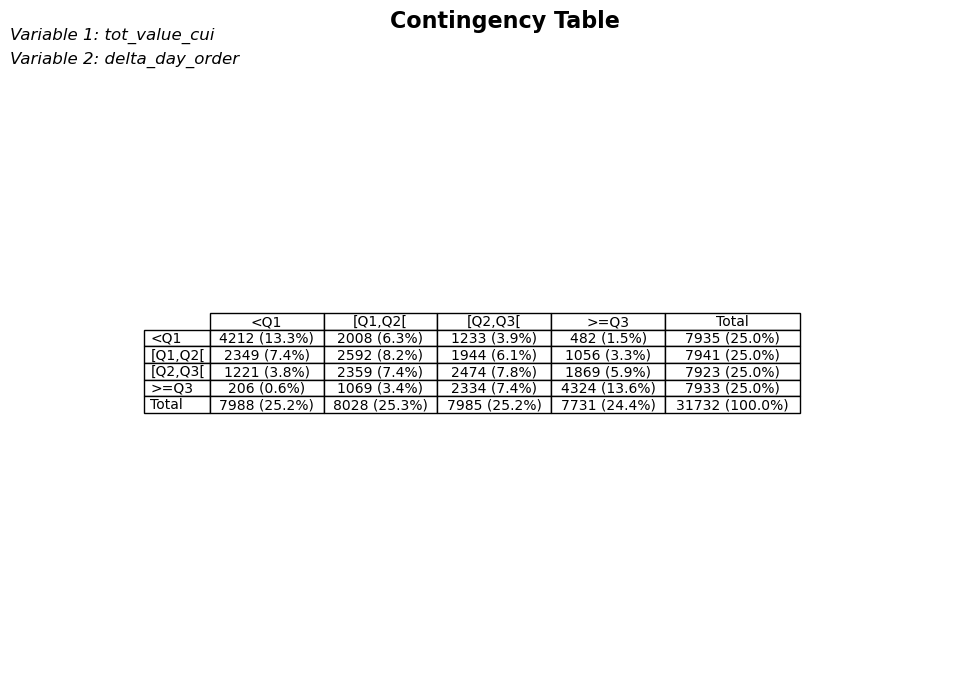

In [31]:
#Create quartiles for 'tot_value_cui'
tot_value_cui_bins = pd.qcut(df['tot_value_cui'], q=4, labels=["<Q1", "[Q1,Q2[", "[Q2,Q3[", ">=Q3"])

#Create quartiles for 'delta_day_order'
delta_day_order_bins = pd.qcut(df['delta_day_order'], q=4, labels=["<Q1", "[Q1,Q2[", "[Q2,Q3[", ">=Q3"])

#Create the contingency table
contingency_table = pd.crosstab(tot_value_cui_bins, delta_day_order_bins, margins=True, margins_name="Total")

#Add percentages to the contingency table
contingency_table_percentage = contingency_table.div(contingency_table.loc["Total", "Total"]) * 100

#Format the table with absolute values and percentages
final_table = contingency_table.astype(str) + " (" + contingency_table_percentage.round(1).astype(str) + "%)"

#Generate an image with matplotlib
fig, ax = plt.subplots(figsize=(12, 8))  # Adjust size to fit everything
ax.axis('off')  # Remove axes

#Add title
plt.title("Contingency Table", fontsize=16, fontweight='bold', loc='center', pad=20)

#Add variable names
plt.figtext(0.1, 0.9, "Variable 1: tot_value_cui", fontsize=12, ha="left", style="italic")
plt.figtext(0.1, 0.87, "Variable 2: delta_day_order", fontsize=12, ha="left", style="italic")

#Create the table
table = ax.table(
    cellText=final_table.values, 
    colLabels=final_table.columns, 
    rowLabels=final_table.index, 
    cellLoc='center', 
    loc='center'
)

#Adjust the cell size
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(final_table.columns))))

#Save as an image
plt.savefig("contingency_table.png", dpi=300, bbox_inches="tight")
plt.show()